# Regressão Linear 
data: 02/2020
## Resumo

Neste caderno será descrito o modelo de Regressão linear, e serão estudados alguns de seus aspectos, tanto teóricos, quanto práticos, com o objetivo de compreender melhor o modelo em si, e sua importância, tanto para a estatística, quanto para o aprendizado de máquina. Alguns algoritmos serão implementados e testados, visando a melhor compreensão e visualização dos conceitos.

## Sumário

<ol>
<li>Introdução</li>
<li>Solução Analítica</li>
<li>Teste da Solução Analítica</li>
<li>Algoritmo OLS ("Ordinary Least Squares")</li>
<li>Teste do algoritmo OLS em uma dimensão</li>
<li>Teste do algoritmo OLS em duas dimensões</li>
</ol>

## 1. Introdução
Regressão Linear é um modelo matemático linear, que se adequa para resolver problemas que envolvem funções alvo com valores reais. É um modelo amplamente utilizado em estatística, com solução para sua forma mais simples amplamente conhecida, contudo, aqui será tratado da perspectiva do aprendizado de máquina. É um modelo bem útil para fazer previsões futuras baseados em dados já amplamente conhecidos.

Para esse modelo, temos como dados um conjunto de pares $ (x_1,y_1), (x_2,y_2), (x_3,y_3)... (x_n,y_n)  $ sendo $ x_n $ é  vetor de informações sobre cada dado, associado ao número real $y_n$.

A resolução do problema de regressão linear, envolve encontrar a melhor equação $ \hat{y} = b_0 + b_1.x_1 + b_2.x_2 + ... + b_n.x_n $ que se adequa com os dados, ou seja, a que produz o menor erro, caso sirva de aproximação.  


## 2. Solução Analítica

Para a versão mais simples do modelo de regressão linear, ou seja, aquela em que o vetor $ x $ possui apenas uma dimensão, há uma maneira simples de resolver o problema analíticamente.
Com algumas ferramentas estatísticas, é possível chegar na equação $ \hat{y} = a + b.x $ que minimiza o erro quadrático médio do conjunto de dados.
A solução é dada por:

$ b = \dfrac{\sum \limits _{i=1} ^{n} x_i.y_i- n.\overline{x}.\overline{y}}{\sum \limits _{i=1} ^{n}x_i^2 - n.\overline{x^2}}$

e 

$ a = \overline{y} - b.\overline{x} $

A seguir vemos um exemplo de algoritmo que descobre o conjunto (a,b) que melhor se adequa aos dados.

In [2]:
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


def aregression(x, y):
    xm = stat.mean(x)  
    xd = x - xm
    ym = stat.mean(y)
    yd = y - ym
    sxy = np.sum(xd*yd) # cálculo do numerador
    sxx = np.sum(xd**2) # cálculo do denominador
    b = sxy/sxx
    a = ym - b*xm
    return a, b
    

 ## 3.Teste da Solução Analítica

A reta obtida pela solução analítica é: y =  0.7707986472424557  +   0.6129357440166493 x


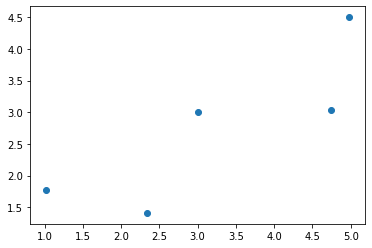

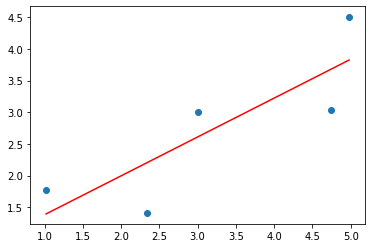

In [3]:
def esbocar(x,y, yp):
    plt.figure(1)
    plt.scatter(x, y)
    plt.figure(2)
    plt.scatter(x,y)
    plt.plot(x, yp, color = 'red')

    
pontos = np.array([[1.02, 1.77], [2.34, 1.41], [3, 3], [4.74,3.03], [4.98,4.5]])
#pontos = np.array([[0.05, 0.12], [0.18, 0.22], [0.31, 0.35], [0.42, 0.38], [0.5, 0.49]])
x = pontos[:,0]
y = pontos[:,1]
a, b = aregression(x, y)
yp = a + b*x
esbocar(x,y, yp)
print("A reta obtida pela solução analítica é: y = ", a, " +  ", b, "x")

## 4.Algoritmo OLS ("Ordinary Least Squares")

Esse algoritmo se baseia em implementar um vetor $ w $ que é um vetor que dá "pesos" diferentes pra cada vetor $ x_i $, e manipular a equação do erro quadrático médio do conjunto de dados de entrada, para encontrar o vetor $ w $ que minimiza o erro.

Partimos então da expressão de erro:
$E_{in}(w) = \frac{1}{N}.\sum \limits _ {n=1} ^{N}(w^T.x_n - y_n)^2 $

percebemos que o erro será mínimo quando:

$\nabla{E_in(w)} = 0$

Após manipulação envolvendo cálculo matricial, e renomeando $ w^T.x_n$ de $Xw$ (sendo X uma matriz composta pelos $x_n$'s chegamos em:

$\nabla{E_in(w)} =  \frac{2}{N}.(X^T . Xw - X^T . y) $

que é zero quando $w$ satisfaz:

$X^TXw = X^Ty $.

sendo $ X^TX$ invertível, chegamos em $ w = X^\dagger y $ que é a solução óptima do problema, onde $X^\dagger = (X^TX)^{-1}X^T $ é a pseudo-inversa da matriz X.

O algoritimo, apesar de não ser como a maioria dos algoritmos de aprendizado de máquina, e só envolver o cálculo de uma "pseudo-inversa", é extremamente útil na prática, principalmente pela sua facilidade de implementação, e  também porque para dimensões mais baixas, o algoritmo não necessita de um esforço computacional muito grande.

Abaixo está uma implementação do algoritmo explicado..

In [4]:
import numpy as np
import matplotlib.pyplot as plt
    
def regression (x, y):
    X = x
    ones = np.ones((len(X), 1))
    n = X.ndim # ve a dimensão do vetor X
    if (n == 1):
        X = x.reshape((len(x), 1))
    X = np.append(ones, X, axis = 1)
    Xt = np.transpose(X)
    w = np.linalg.pinv(X).dot(y)
    return w
    


## 5.Teste do algoritmo OLS em 1 dimensão

A reta obtida pela solução acima é: y =  0.7707986472424544  +   0.6129357440166496 x


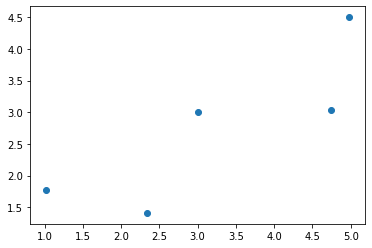

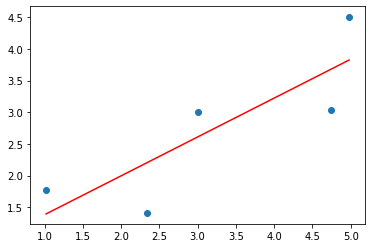

In [5]:
def esbocar(x,y, yp):
    plt.figure(1)
    plt.scatter(x, y)
    plt.figure(2)
    plt.scatter(x,y)
    plt.plot(x, yp, color = 'red')


pontos = np.array([[1.02, 1.77], [2.34, 1.41], [3, 3], [4.74,3.03], [4.98,4.5]]) #dados
#pontos = np.array([[0.05, 0.12], [0.18, 0.22], [0.31, 0.35], [0.42, 0.38], [0.5, 0.49]])
#pontos = np.array([[1, 2.5], [0.5, 0.5], [2, 2], [4, 0.1], [0.1, 5] , [6,4], [8,2], [6,2], [5, 5], [3, 7], [7, 6], [8, 5]])
x = pontos[:,0]
y = pontos[:,1]
w = regression (x, y)
X = x.reshape((len(x), 1)) # montando o vetor X neste escopo
ones = np.ones((len(X), 1))
X = np.append(ones, X, axis = 1)
yp = np.dot(X, w)
m = (yp[1]-yp[0])/(x[1]-x[0]) #descobrindo o slope da eq da reta
b = yp[0] - m* x[0] #descobrindo o intercept da eq da reta
esbocar(x, y, yp)


print("A reta obtida pela solução acima é: y = ", b, " +  ", m, "x")


## 6.Teste do algoritmo OLS em duas dimensões

Uma primeira vantagem do algoritmo OLS em relação a solução analítica, é que ele é simples, mesmo para mais de uma dimensão.

Agora para outro exemplo, seguirá um teste do mesmo algoritmo acima, só que agora em mais dimensões.

A eq do plano é  -2.023405985686402 *x +  -0.036801453047062616 *y +  3.299999999999999 * z =  2.4603631533289883


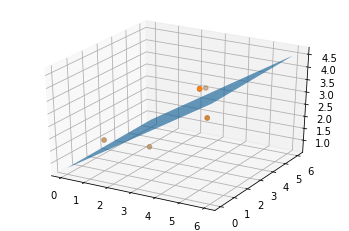

<Figure size 432x288 with 0 Axes>

In [6]:
def eqplano(p1, p2, p3):  #Função que, dado 3 pontos, retorna os parâmetros (a,b,c,d) da eq do plano associado aos pontos
    v1 = p3 - p1
    v2 = p3 - p2
    cross = np.cross(v1,v2)
    d = cross.dot(p1)
    a, b, c = cross
    return a, b, c, d


pontos2d = np.array([[1.02, 1, 1.77], [2.34, 2, 1.41], [3, 5, 3], [4.74, 2 , 3.03], [4.98, 1 ,4.5]]) #dados


xa = pontos2d[:,0]
xa = xa.reshape((len(X), 1))
xb = pontos2d[:,1]
xb = xb.reshape((len(X), 1))
x = np.append(xa, xb, axis = 1) #formando o vetor x com os dados
y = pontos2d[:,2]
m, n = x.shape
X = x
if (n == 1):
    X = x.reshape((len(x), 1))
ones = np.ones((len(X), 1))
X = np.append(ones, X, axis = 1)
w = regression(x, y)
yp = np.dot(X, w)
ax = plt.axes(projection="3d")
p1 = np.array([x[0][0], x[0][1], yp[0]]) #selecionando 3 pontos para descobrir a eq do plano
p2 = np.array([x[1][0], x[1][1], yp[1]])
p3 = np.array([x[2][0], x[2][1], yp[2]])
a, b, c, d = eqplano(p1, p2, p3)
print("A eq do plano é ", a, "*x + ", b ,"*y + ", c, "* z = ", d)



#plot 3d
u = np.linspace (np.min(x[:,0]) - 1, np.max(x[:,1]) + 1, 50)
v = np.linspace (np.min(x[:,0]) - 1, np.max(x[:,1]) + 1, 50)
U, V = np.meshgrid(u,v)
z = (d - a*U - b*V)/c
plt.figure(1)
ax.scatter3D(x[:,0], x[:,1] ,y)
plt.figure(2)
ax.scatter3D(x[:,0], x[:,1] ,y)
ax.plot_surface(U, V, z)


## 7.Previsões

Com o algoritmo funcionando corretamente, podemos tentar fazer previsões, ou seja, se tivermos um novo dado ($ x_{n+1} $), qual seria o $ \hat{y} $ que mais se adequaria a ele, baseado nos dados que já obtínhamos.

Para isso podemos usar o seguinte algoritmo:

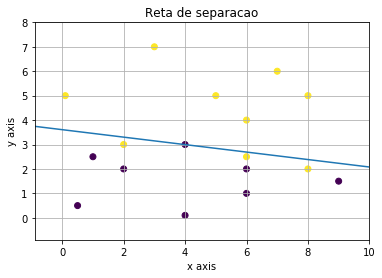

In [14]:
def esbocar(w, b, x, y, i, c):
    pbx = np.max(x[:,0])
    pby = np.max(x[:,1])
    psx = np.min(x[:,0])
    psy = np.min(x[:,1])
    plt.figure(i)
    plt.scatter(x[:,0],x[:,1],c=y2)

    #Abordagem do plano
    p1 = np.array([x[0][0], x[0][1], yp[0]]) #selecionando 3 pontos para descobrir a eq do plano
    p2 = np.array([x[1][0], x[1][1], yp[1]])
    p3 = np.array([x[2][0], x[2][1], yp[2]])
    
    a, b, c, d = eqplano(p1, p2, p3)
    u = np.linspace(psx - 1, pbx + 1, 1000)
    v = (d - a*u )/b
    
    plt.plot(u,v)
    plt.grid(True)
    plt.xlim(psx - 1, pbx + 1)
    plt.ylim(psy - 1, pby + 1)
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.title("Reta de separacao")




x2 = np.array([[1, 2.5], 
               [0.5, 0.5], 
               [2, 2], 
               [4, 0.1], 
               [0.1, 5] , 
               [6,4], 
               [8,2], 
               [6,2], 
               [5, 5], 
               [3, 7], 
               [7, 6], 
               [8, 5], 
               [4, 3], 
               [6, 2.5],
               [2, 3],
               [9, 1.5],
               [6, 1]])
y2 = [-1 , -1, -1, -1 , 1 , 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1]

w = regression(x2, y2)
x = x2
y = y2
w = regression (x, y)
X = x
ones = np.ones((len(X), 1))
X = np.append(ones, X, axis = 1)
yp = np.dot(X, w)
esbocar(w, 1, x, y, 1, y2)

In [8]:
def predict(X, w):
    # Make sure the data matrix has a bias coordinate
    #if X.shape[1] != w.shape[0]:
        # Add a bias value 1 as the first coordinate of each vector
        #X = np.concatenate([np.ones((len(X), 1)), X], axis = 1)
    return np.sign(np.dot(X, w))


def PLA(X, y, w0):
    return_history = False
    # Add a bias value 1 as the first coordinate of each vector
    X = np.concatenate([np.ones((len(X), 1)), X], axis = 1)
    
    # Initialize the weight vector with random values
    # Here, drawn independently from a normal unit distribution
    w = w0
    
    # To store the number of misclassified samples at each iteration
    history = []
    bestmisc = []
    y_hat = predict(X, w)
    bestmisc = np.where(y != y_hat)[0]

    for it in range(1000):
        # Make predictions using the current weight vector
        y_hat = predict(X, w)
        
        # Get the position of all misclassified samples
        misclassified = np.where(y != y_hat)[0]
        
        # Append the current iteration's accuracy
        
        history.append(len(misclassified))
        if len(misclassified) <= len(bestmisc):
            bestmisc = misclassified
            wb = w
        if len(misclassified) == 0:
            # If all samples are correct, just stop
            break
        
        # Otherwise, take the first misclassified sample...
        x_i = X[misclassified[0]]
        y_i = y[misclassified[0]]
        
        # ...and apply the PLA
        w += y_i * x_i
    
    if return_history:
        return wb, history
    else:
        return wb

In [9]:
w = PLA(x, y, 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


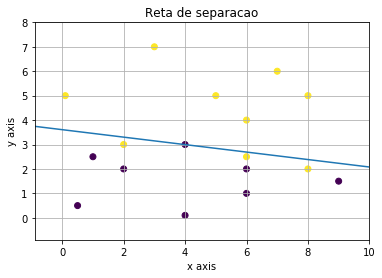

In [10]:
esbocar(w, 1, x, y, 1, y2)

In [15]:
w

array([-1.37157596,  0.05811111,  0.38017983])

In [12]:
w

array([-105. ,    9.2,   22.2])